In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import csv
urls_delfi_toor = []

with open('delfi_päevauudised_2020_03122020.csv', 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for line in reader:
        if line != []:
            urls_delfi_toor.append(line[0])

In [2]:
len(urls_delfi_toor)

6226

In [3]:
def my_function(x):
      return list(dict.fromkeys(x))

urls_delfi = my_function(urls_delfi_toor)

print(len(urls_delfi))

6226


In [4]:
len(urls_delfi)

6226

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm

headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)
pealkiri = soup.find("meta", {"property" :"og:title"})['content']
artiklid_delfi_politicsf = {}
pealkirjad_delfi_politics = []
tekstid_delfi_politics = []
väljaanded_delfi_politics = []
ajad_delfi_politics =[]
thearticle = []

for url in tqdm(urls_delfi):
    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    yhendatud_tekst = []
    if soup.find("meta", {"property" :"og:title"})['content']:
        pealkiri = soup.find("meta", {"property" :"og:title"})['content']
        pealkirjad_delfi_politics.append(pealkiri)

    #<div class="article__body" itemprop="articleBody">
    tekst = soup.findAll("div", {"class" : "article__body"})#.get_text(strip=True)
    #yhendatud_tekst = ' '
    for t in tekst:
        p = t.find_all('p')
        for r in p:
            #yhendatud_tekst += r.text
            yhendatud_tekst.append(r.text)
            #print(r.text)
    tekstid_delfi_politics.append(yhendatud_tekst)
    #tekstid_delfi_politics = " ".join(yhendatud_tekst)
    
    #<meta property="og:site_name" content="Forte" />
    väljaanne = soup.find("meta", {"property" :"og:site_name"})['content']
    väljaanded_delfi_politics.append(väljaanne)
   
    #<div class="article__date">12.11.2020, 09:28</div>
    if soup.find("meta", {"property" : "article:published_time"})['content']:#.get_text(strip=True):
        aeg = soup.find("meta", {"property" : "article:published_time"})['content']
        ajad_delfi_politics.append(aeg)
artikkel = [' '.join(article) for article in tekstid_delfi_politics]
artiklid_delfi_politics = {'title': pealkirjad_delfi_politics, 'text': artikkel,'subject': väljaanded_delfi_politics, 'date': ajad_delfi_politics}


100%|████████████████████████████████████████████████████████████████████████████| 6226/6226 [1:21:29<00:00,  1.27it/s]


In [64]:
data_delfi = pd.DataFrame(artiklid_delfi_politics, columns = ['title', 'text','subject', 'date'])

In [66]:
data_delfi.to_csv('data_delfi_arhiiv_03122020.csv',index=False)

In [9]:
data_delfi_u = pd.read_csv("data_delfi_arhiiv_03122020.csv")

In [10]:
data_delfi_u['link'] = urls_delfi

In [11]:
data_delfi_u.dropna(inplace=True)

In [12]:
data_delfi_u.shape

(6152, 5)

In [13]:
data_delfi_u[data_delfi_u['subject'] == 'Eesti Naine']

,title,text,subject,date,link
6043,ERISAADE | Kuidas koroonakriisis vaimselt tuge...,Teadlased kasutavad praegust koroona kriisi ai...,Eesti Naine,1590740482,https://lood.delfi.ee/eestinaine/vaimnetervis/...


subject
Alkeemia              12
Anne & Stiil           9
Anne & Stiil Web       1
Delfi               5048
Eesti Ekspress         9
Eesti Naine            1
Eesti Päevaleht      761
Forte                 48
Ilmateade             30
Kasulik               11
Kinoveeb               1
LP                     8
Lemmikloom            12
Maakodu               12
Maaleht               14
Naistekas             20
Oma Maitse             1
Paber EPL              4
Pere ja Kodu           4
Sport                 10
Tervis Pluss           2
Ärileht              134
Name: text, dtype: int64


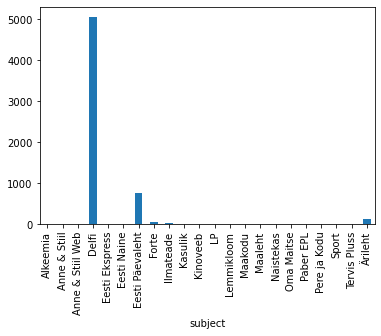

In [14]:
# How many articles per subject?
print(data_delfi_u.groupby(['subject'])['text'].count())
data_delfi_u.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [15]:
delfi_filter = data_delfi_u[(data_delfi_u['subject'] != 'Alkeemia') & (data_delfi_u['subject'] != 'Anne & Stiil') 
                        & (data_delfi_u['subject'] != 'Anne & Stiil Web') & (data_delfi_u['subject'] != 'Eesti Naine')
                        & (data_delfi_u['subject'] != 'Ilmateade') & (data_delfi_u['subject'] != 'Kasulik')
                        & (data_delfi_u['subject'] != 'Kinoveeb') & (data_delfi_u['subject'] != 'LP')
                        & (data_delfi_u['subject'] != 'Lemmikloom') & (data_delfi_u['subject'] != 'Maakodu')
                        & (data_delfi_u['subject'] != 'Maaleht') & (data_delfi_u['subject'] != 'Maakodu')
                        & (data_delfi_u['subject'] != 'Oma Maitse') & (data_delfi_u['subject'] != 'Naistekas')
                        & (data_delfi_u['subject'] != 'Paber EPL') & (data_delfi_u['subject'] != 'Pere ja Kodu')
                        & (data_delfi_u['subject'] != 'Sport') & (data_delfi_u['subject'] != 'Tervis Pluss')
                        & (data_delfi_u['subject'] != 'Delfi TV')].reset_index(drop = True)

In [16]:
delfi_filter

,title,text,subject,date,link
0,Sotsiaalminister Kiik: uusi piiranguid ei saa ...,"""Vastavalt kokkulepitud korrale vaatame iga ka...",Delfi,1607028290,https://www.delfi.ee/news/paevauudised/eesti/s...
1,FOTOD | Sillamäe elanikud ootavad vene vaktsii...,"Astume ühe mehe juurde, kes seisab pingi juure...",Delfi,1607025909,https://www.delfi.ee/news/paevauudised/eesti/f...
2,Paljud koroonahaiged ei taastugi. Kuus eestlas...,"„Kevadine aeg oli minu jaoks lihtne. See, mis ...",Eesti Päevaleht,1607023536,https://epl.delfi.ee/uudised/paljud-koroonahai...
3,Maris Jesse: enne märtsi tavainimesed koroonav...,"Jesse selgitas ""Ringvaates"", et esmalt saavad ...",Delfi,1607020018,https://www.delfi.ee/news/paevauudised/eesti/m...
4,Vene riigi reetmises kahtlustatav Sergei Lõhmu...,Petseri linnas elanud Lõhmus peeti kinni mullu...,Delfi,1607018993,https://www.delfi.ee/news/paevauudised/krimi/v...
...,...,...,...,...,...
5995,Hiina katse Hongkongile päitseid pähe tõmmata ...,Tuhanded meeleavaldajad kogunesid hommikul lin...,Delfi,1590309327,https://www.delfi.ee/news/paevauudised/valisma...
5996,GRAAFIK | Ööpäevaga lisandus kaks positiivset ...,Rahvastikuregistri andmetele tuginedes lisandu...,Delfi,1590306024,https://www.delfi.ee/news/paevauudised/eesti/g...
5997,Põhja-Korea liider lubas riigi tuumaheidutust ...,Valitseva Töölispartei võimsa sõjaväelise kesk...,Delfi,1590305431,https://www.delfi.ee/news/paevauudised/valisma...
5998,Olev Subbi maal tegi eilsel oksjonil uue rekor...,Rahvusvahelisel oksjoniplatvormil Live Auction...,Eesti Päevaleht,1590305388,https://epl.delfi.ee/kultuur/olev-subbi-maal-t...


In [19]:
delfi_filter.to_csv('data_delfi.csv',index=False)

In [17]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju', 'setu']

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [12:20<00:00,  8.11it/s]


(-0.5, 799.5, 499.5, -0.5)

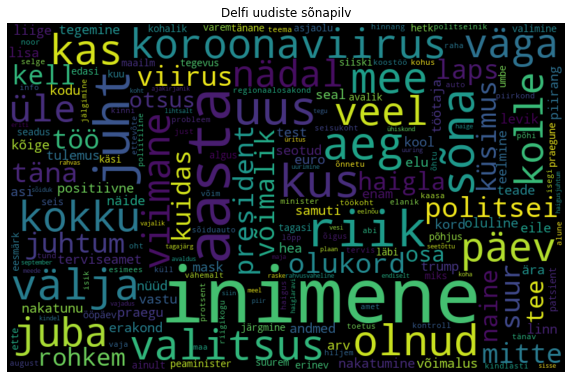

In [18]:
from wordcloud import WordCloud
from estnltk import Text
from tqdm import tqdm

real_sonad = []
for i in tqdm(range (0, len(delfi_filter))):
    rida = delfi_filter.iloc[i]
    #print(rida[1])
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U' or sona[0][1] == 'D':
            real_sonad.append(sona[0][0])

all_words = ' '.join(map(str, real_sonad))

wordcloud = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Delfi uudiste sõnapilv")
plt.savefig('Delfi_uudiste_sõnapilv.png')
plt.axis("off")